## Problem Statement

## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### To predict a Customer is eligible for loan amount

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score, confusion_matrix, classification_report

In [13]:
train = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Loan_processing_logistic_reg\train_ctrUa4K.csv')
test = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Loan_processing_logistic_reg\test_lAUu6dG.csv')
submission = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Loan_processing_logistic_reg\sample_submission_49d68Cx.csv')

In [532]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [533]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [534]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


### To find the column difference between train and test 

In [535]:
train.columns.difference(test.columns)       #LoAN_STATUS IS DIFFERENT

Index(['Loan_Status'], dtype='object')

In [536]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [537]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [538]:
train.select_dtypes(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [539]:
train.select_dtypes(exclude='object')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [540]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [541]:
train.shape

(614, 13)

In [542]:
test.shape

(367, 12)

### Let's find the null values in train data

In [543]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###  Let's try to find the duplicates

In [544]:
train.duplicated().sum()

0

In [545]:
train['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [546]:
train['Self_Employed'].value_counts(dropna=False, normalize=True*100)

No     0.814332
Yes    0.133550
NaN    0.052117
Name: Self_Employed, dtype: float64

In [547]:
train['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [548]:
train['Credit_History'].value_counts(dropna=False, normalize = True*100)

1.0    0.773616
0.0    0.144951
NaN    0.081433
Name: Credit_History, dtype: float64

In [549]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [550]:
test[test['Self_Employed'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,LP001208,Male,Yes,2,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban
72,LP001375,Male,Yes,1,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban
89,LP001472,Female,No,0,Graduate,NaN,5058,0,200.0,360.0,1.0,Rural
142,LP001789,Male,Yes,3+,Not Graduate,NaN,6794,528,139.0,360.0,0.0,Urban
161,LP001906,Male,No,0,Graduate,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,LP001950,Female,Yes,3+,Graduate,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,LP001999,Male,Yes,2,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural


In [551]:
test[test['Self_Employed'].notna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


### Let's concatenate to maintain the consistency in both train and test

In [552]:
data = pd.concat([train,test])

In [553]:
display(data.head(1), data.tail(1))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


### Let's reset the index after concatenation to avoid Duplication 

In [554]:
data.reset_index(inplace=True, drop=True)

In [555]:
display(data.head(1), data.tail(1))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [556]:
train.shape[0], test.shape[0], train.shape[0] + test.shape[0] , data.shape[0]

(614, 367, 981, 981)

In [557]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [558]:
#data['Gender'].fillna('unknown', inplace=True)

In [559]:
#data['Married'].fillna('unknown', inplace =True)

In [560]:
#data['Dependents'].fillna(data['Dependents'].mode()[0], inplace =True)

In [561]:
#data['Self_Employed'].fillna('unknown', inplace =True)

In [562]:
#data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace =True)

In [563]:
#data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace =True)

In [564]:
#data['Credit_History'].fillna(0.0, inplace =True)

In [565]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

<AxesSubplot:>

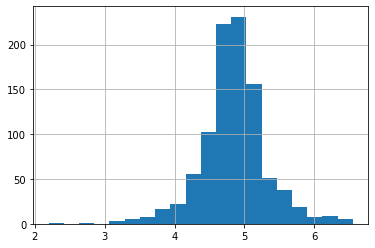

In [566]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

In [567]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace =True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace =True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace =True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace =True)
data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean(), inplace =True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace =True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace =True)


In [568]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome']=np.log(data['TotalIncome'])

<AxesSubplot:>

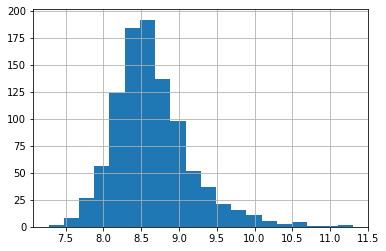

In [569]:
data['TotalIncome'].hist(bins=20)

In [570]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,4.845892,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,4.948760,8.699515


In [571]:
for i in data.columns:
    if data[i].dtype == 'object':
        nuni = data[i].nunique()
        print(i, nuni)

Loan_ID 981
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


In [572]:
data.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [573]:
encoded_data = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area'])
encoded_data.shape       

(981, 24)

In [574]:
encoded_data.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'TotalIncome', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

### Univariate analysis

<AxesSubplot:>

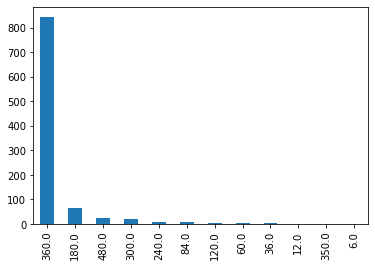

In [575]:

data['Loan_Amount_Term'].value_counts().plot(kind='bar')

<AxesSubplot:>

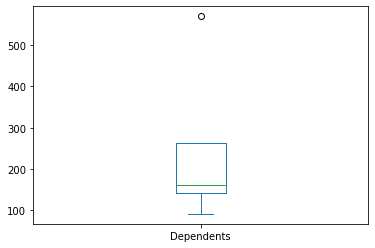

In [576]:
data['Dependents'].value_counts().plot(kind='box')

<AxesSubplot:ylabel='Self_Employed'>

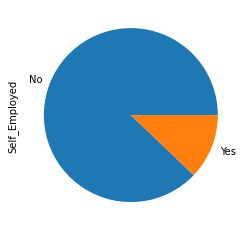

In [577]:
data['Self_Employed'].value_counts().plot(kind='pie')

<AxesSubplot:>

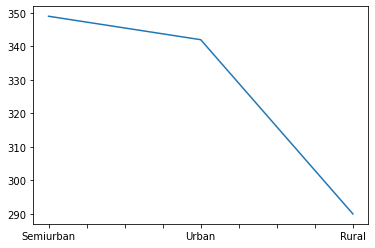

In [578]:
data['Property_Area'].value_counts().plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

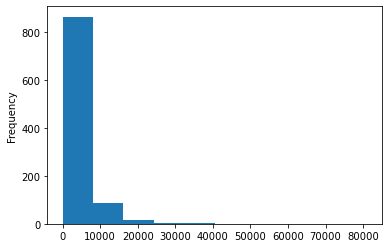

In [579]:
data['ApplicantIncome'].plot(kind='hist')
                                    

<AxesSubplot:ylabel='Density'>

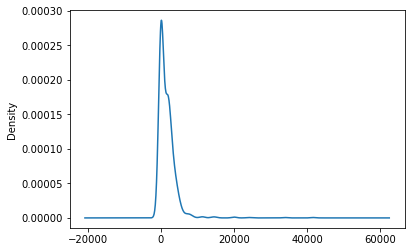

In [580]:
data['CoapplicantIncome'].plot(kind='kde')

<AxesSubplot:>

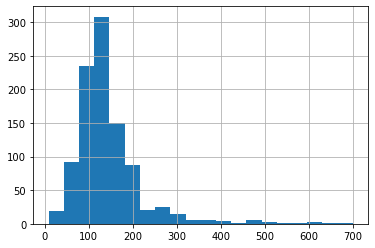

In [581]:
data['LoanAmount'].hist(bins=20)

<AxesSubplot:>

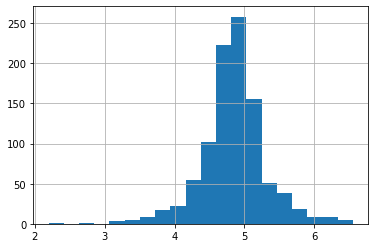

In [582]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

In [583]:
#bivariate analysis

In [584]:
def bivariate_percent_plt(x,y):
    cross = pd.crosstab(x,y)
    cross.div(cross.sum(1),axis=0).plot(kind='bar', stacked=True)
    

In [585]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome'],
      dtype='object')

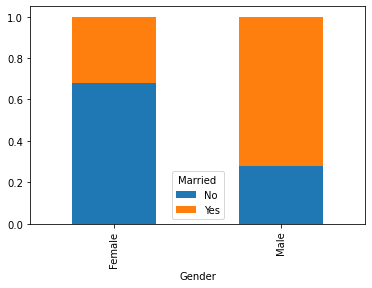

In [586]:
bivariate_percent_plt(data['Gender'],data['Married'])

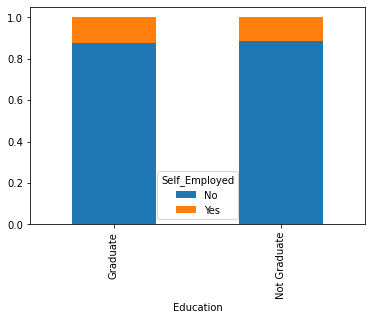

In [587]:
bivariate_percent_plt(data['Education'],data['Self_Employed'])

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

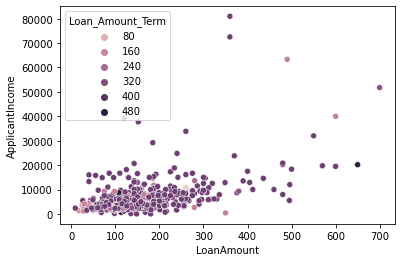

In [588]:
sns.scatterplot(x =data['LoanAmount'],y =data['ApplicantIncome'],hue=data['Loan_Amount_Term'])

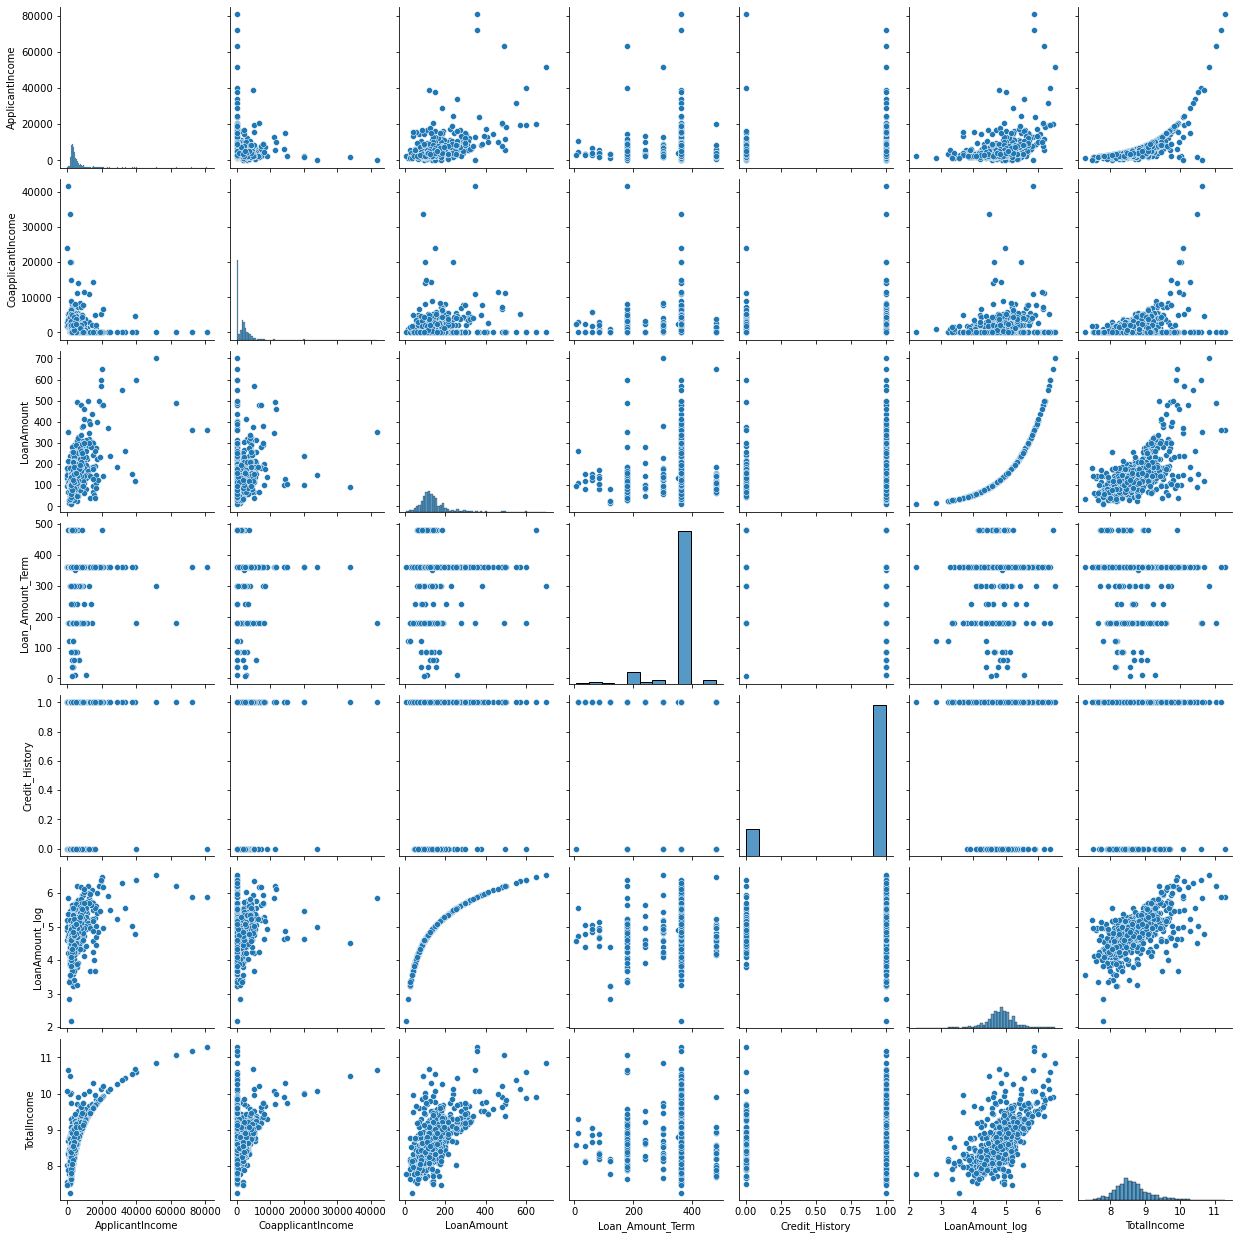

In [589]:
sns.pairplot(data)

<AxesSubplot:>

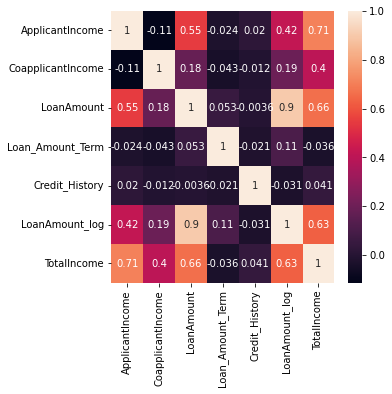

In [590]:
plt.figure(figsize=(5,5))
sns.heatmap(data.drop(columns=['Loan_ID','Loan_Status']).corr(), annot=True)

In [591]:
data.drop(columns=['Loan_ID','Loan_Status']).describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.000000,2875.000000,3800.00000,5516.000000,81000.000000
CoapplicantIncome,981.0,1601.916330,2718.772806,0.000000,0.000000,1110.00000,2365.000000,41667.000000
LoanAmount,981.0,142.511530,76.347770,9.000000,101.000000,128.00000,160.000000,700.000000
Loan_Amount_Term,981.0,342.564730,64.482011,6.000000,360.000000,360.00000,360.000000,480.000000
Credit_History,981.0,0.849134,0.358101,0.000000,1.000000,1.00000,1.000000,1.000000
LoanAmount_log,981.0,4.849017,0.468113,2.197225,4.615121,4.85203,5.075174,6.551080
TotalIncome,981.0,8.649904,0.520593,7.273786,8.334712,8.57810,8.896725,11.302204


In [592]:
encoded_data.select_dtypes(exclude='object').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [593]:
scale = MinMaxScaler()

In [594]:
scaled_data =scale.fit_transform(encoded_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])
scaled_data =pd.DataFrame(scaled_data, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History'])
print(scaled_data.shape)
scaled_data.head(3)

(981, 5)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072210,0.000000,0.193215,0.746835,1.0
1,0.056580,0.036192,0.172214,0.746835,1.0
2,0.037037,0.000000,0.082489,0.746835,1.0


In [595]:
preprocessed_data = pd.concat([scaled_data, encoded_data.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History'])],axis=1)
preprocessed_data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status,LoanAmount_log,TotalIncome,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072210,0.000000,0.193215,0.746835,1.0,LP001002,Y,4.845892,8.674026,0,...,0,0,0,1,0,1,0,0,0,1
1,0.056580,0.036192,0.172214,0.746835,1.0,LP001003,N,4.852030,8.714568,0,...,1,0,0,1,0,1,0,1,0,0
2,0.037037,0.000000,0.082489,0.746835,1.0,LP001005,Y,4.189655,8.006368,0,...,0,0,0,1,0,0,1,0,0,1
3,0.031889,0.056592,0.160637,0.746835,1.0,LP001006,Y,4.787492,8.505323,0,...,0,0,0,0,1,1,0,0,0,1
4,0.074074,0.000000,0.191027,0.746835,1.0,LP001008,Y,4.948760,8.699515,0,...,0,0,0,1,0,1,0,0,0,1


In [596]:
display(preprocessed_data.head(1), preprocessed_data.tail(1))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status,LoanAmount_log,TotalIncome,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.07221,0.0,0.193215,0.746835,1.0,LP001002,Y,4.845892,8.674026,0,...,0,0,0,1,0,1,0,0,0,1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status,LoanAmount_log,TotalIncome,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
980,0.11358,0.0,0.128799,0.367089,1.0,LP002989,NaN,4.584967,9.126959,0,...,0,0,0,1,0,0,1,1,0,0


In [597]:
encoded_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,142.51153,360.0,1.0,Y,4.845892,8.674026,0,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.00000,360.0,1.0,N,4.852030,8.714568,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.00000,360.0,1.0,Y,4.189655,8.006368,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.00000,360.0,1.0,Y,4.787492,8.505323,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.00000,360.0,1.0,Y,4.948760,8.699515,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,4009,1777.0,113.00000,360.0,1.0,NaN,4.727388,8.663196,0,...,0,0,1,0,1,0,1,0,0,1
977,LP002975,4158,709.0,115.00000,360.0,1.0,NaN,4.744932,8.490233,0,...,0,0,0,1,0,1,0,0,0,1
978,LP002980,3250,1993.0,126.00000,360.0,1.0,NaN,4.836282,8.564649,0,...,0,0,0,1,0,1,0,0,1,0
979,LP002986,5000,2393.0,158.00000,360.0,1.0,NaN,5.062595,8.908289,0,...,0,0,0,1,0,1,0,1,0,0


In [598]:
prepc_train= preprocessed_data[preprocessed_data['Loan_Status'].notna()]
prepc_test = preprocessed_data[preprocessed_data['Loan_Status'].isna()]

In [599]:
prepc_train.to_csv('preprocessed_train_data.csv',index=False)
prepc_test.to_csv('preprocessed_test_data.csv',index=False)

### Modelling part

In [600]:
pptrain = pd.read_csv('preprocessed_train_data.csv')

In [601]:
pptrain.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status,LoanAmount_log,TotalIncome,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072210,0.000000,0.193215,0.746835,1.0,LP001002,Y,4.845892,8.674026,0,...,0,0,0,1,0,1,0,0,0,1
1,0.056580,0.036192,0.172214,0.746835,1.0,LP001003,N,4.852030,8.714568,0,...,1,0,0,1,0,1,0,1,0,0
2,0.037037,0.000000,0.082489,0.746835,1.0,LP001005,Y,4.189655,8.006368,0,...,0,0,0,1,0,0,1,0,0,1
3,0.031889,0.056592,0.160637,0.746835,1.0,LP001006,Y,4.787492,8.505323,0,...,0,0,0,0,1,1,0,0,0,1
4,0.074074,0.000000,0.191027,0.746835,1.0,LP001008,Y,4.948760,8.699515,0,...,0,0,0,1,0,1,0,0,0,1


In [602]:
x = pptrain.drop(columns=['Loan_ID','Loan_Status'])
y= pptrain['Loan_Status']

In [627]:
train_x , test_x, train_y , test_y = train_test_split(x,y,test_size=0.2, random_state=1)

In [628]:
model = LogisticRegression(max_iter=500)

In [629]:
model.fit(train_x, train_y)

LogisticRegression(max_iter=500)

In [630]:
model.coef_ , model.intercept_

(array([[ 0.03574922, -0.96183544, -0.26074904, -0.34382625,  3.32497534,
         -0.23474414,  0.1942256 ,  0.08233254, -0.08187308, -0.26677951,
          0.26723897, -0.11171964, -0.32023181,  0.09752731,  0.3348836 ,
          0.19369211, -0.19323265,  0.02816089, -0.02770143, -0.22054248,
          0.50978515, -0.28878321]]),
 array([-2.29854563]))

In [631]:
y_pred =model.predict(train_x)
print('accuracy_score:' , accuracy_score(train_y , y_pred))
print('confusion_matrix\n:' , confusion_matrix(train_y , y_pred))

accuracy_score: 0.8105906313645621
confusion_matrix
: [[ 66  87]
 [  6 332]]


In [632]:
y_test_pred = model.predict(test_x)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.8048780487804879
confusion matrix
 [[16 23]
 [ 1 83]]


In [633]:
pptest_org = pd.read_csv('preprocessed_test_data.csv')

In [634]:
pptest_X = pptest_org.drop(columns=['Loan_ID','Loan_Status'])
y_unpred = model.predict(pptest_X)

In [635]:
np.unique(y_unpred, return_counts=True)

(array(['N', 'Y'], dtype=object), array([ 59, 308], dtype=int64))

In [636]:
submission['Loan_Status']=y_unpred
submission.to_csv('submission_logreg1.csv',index=False)